In [66]:
import pyfolio as pf
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np


def calculate_daily_returns(asset):
    return asset.pct_change()

def compute_strategy_returns(positions, asset1, asset2):
    # Calculate daily returns for each asset
    asset1_returns = calculate_daily_returns(asset1)
    asset2_returns = calculate_daily_returns(asset2)
    # Diagnostic print statements
    print("Positions head:\n", positions.head())
    print("Asset1 returns head:\n", asset1_returns.head())
    print("Asset2 returns head:\n", asset2_returns.head())

    # Calculate daily strategy returns
    strategy_returns = positions.shift(1) * pd.concat([asset1_returns, asset2_returns], axis=1)
    daily_returns = strategy_returns.sum(axis=1)

    # More diagnostic print statements
    print("Strategy returns head:\n", strategy_returns.head())
    print("Daily returns head:\n", daily_returns.head())
    return daily_returns

In [25]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]
# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

tickData


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BTC-USD,ETH-USD
Date,,
2017-01-01,998.325012,NaN
2017-01-02,1021.750000,NaN
2017-01-03,1043.839966,NaN
2017-01-04,1154.729980,NaN
2017-01-05,1013.380005,NaN
...,...,...
2024-01-09,46139.730469,2344.827148
2024-01-10,46627.777344,2582.103516
2024-01-11,46368.585938,2619.619141


Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2019-01-04), Full start (2018-01-05) End full (2019-01-04)]
<bound method PairStrategy.is_valid_pair of Pair [ETH-USD, BTC-USD]
	Window: [Train start (2018-01-05) End train (2019-01-04), Full start (2018-01-05) End full (2019-01-04)]
	p-value: 5.735240730722405e-09
	Pair eligible: True>
0.05545469511469535
-0.0600449950901083
ab perf 0.5039575494055157


Start date,2018-01-05
End date,2019-01-04
Total months,17
,Backtest
Annual return,27.044%
Cumulative returns,41.438%
Annual volatility,29.258%
Sharpe ratio,0.96
Calmar ratio,0.98
Stability,0.62
Max drawdown,-27.461%


,price_y,price_x,full_resid,b,return_y,return_x,return,mu,dist,lower_bound,upper_bound,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,,
2018-01-05,1.0000,1.0000,0.3575,0.4106,0.0000,0.0000,0.0000,-0.002295,0.359795,-0.060045,0.055455,-1.0,0.0000,1.000000,1.000000
2018-01-06,1.0056,1.0441,0.3450,0.4106,0.0056,0.0431,-0.0121,-0.002295,0.347295,-0.060045,0.055455,-1.0,0.0121,0.987973,1.012174
2018-01-07,0.9454,1.1558,0.2389,0.4106,-0.0617,0.1017,-0.1035,-0.002295,0.241195,-0.060045,0.055455,-1.0,0.1035,0.890831,1.122547
2018-01-08,0.8704,1.1512,0.1658,0.4106,-0.0827,-0.0040,-0.0810,-0.002295,0.168095,-0.060045,0.055455,-1.0,0.0810,0.821519,1.217257
2018-01-09,0.8374,1.3027,0.0706,0.4106,-0.0386,0.1237,-0.0894,-0.002295,0.072895,-0.060045,0.055455,-1.0,0.0894,0.751263,1.331092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,0.2147,0.1337,-0.0721,0.4106,-0.0324,-0.0475,-0.0129,-0.002295,-0.069805,-0.060045,0.055455,1.0,-0.0129,0.490613,1.550380
2019-01-01,0.2205,0.1411,-0.0694,0.4106,0.0266,0.0544,0.0043,-0.002295,-0.067105,-0.060045,0.055455,1.0,0.0043,0.492727,1.557061
2019-01-02,0.2262,0.1554,-0.0695,0.4106,0.0257,0.0963,-0.0139,-0.002295,-0.067205,-0.060045,0.055455,1.0,-0.0139,0.485925,1.535567


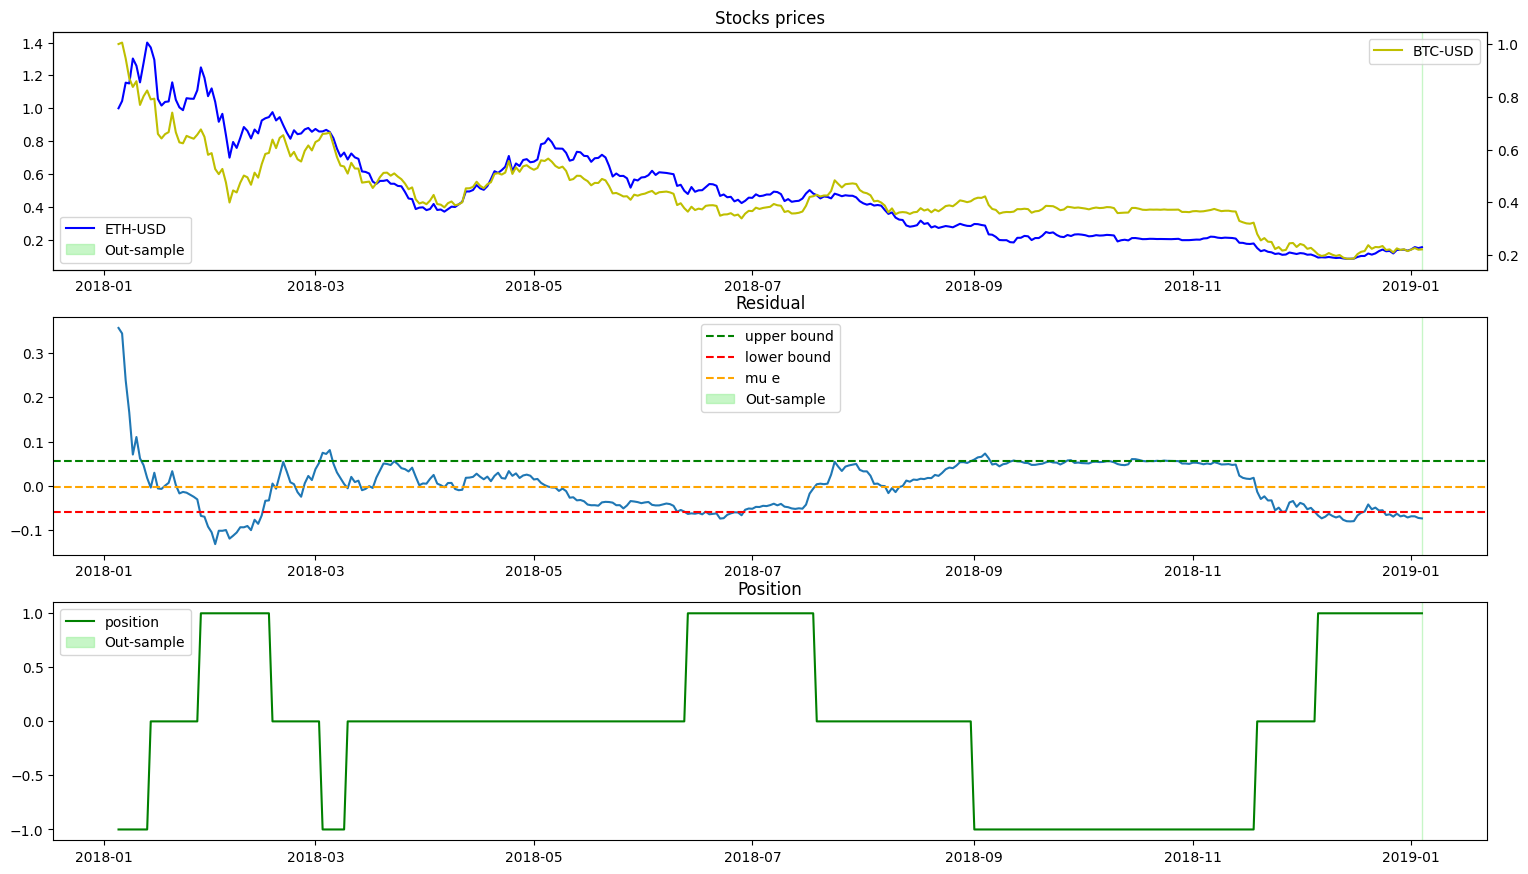

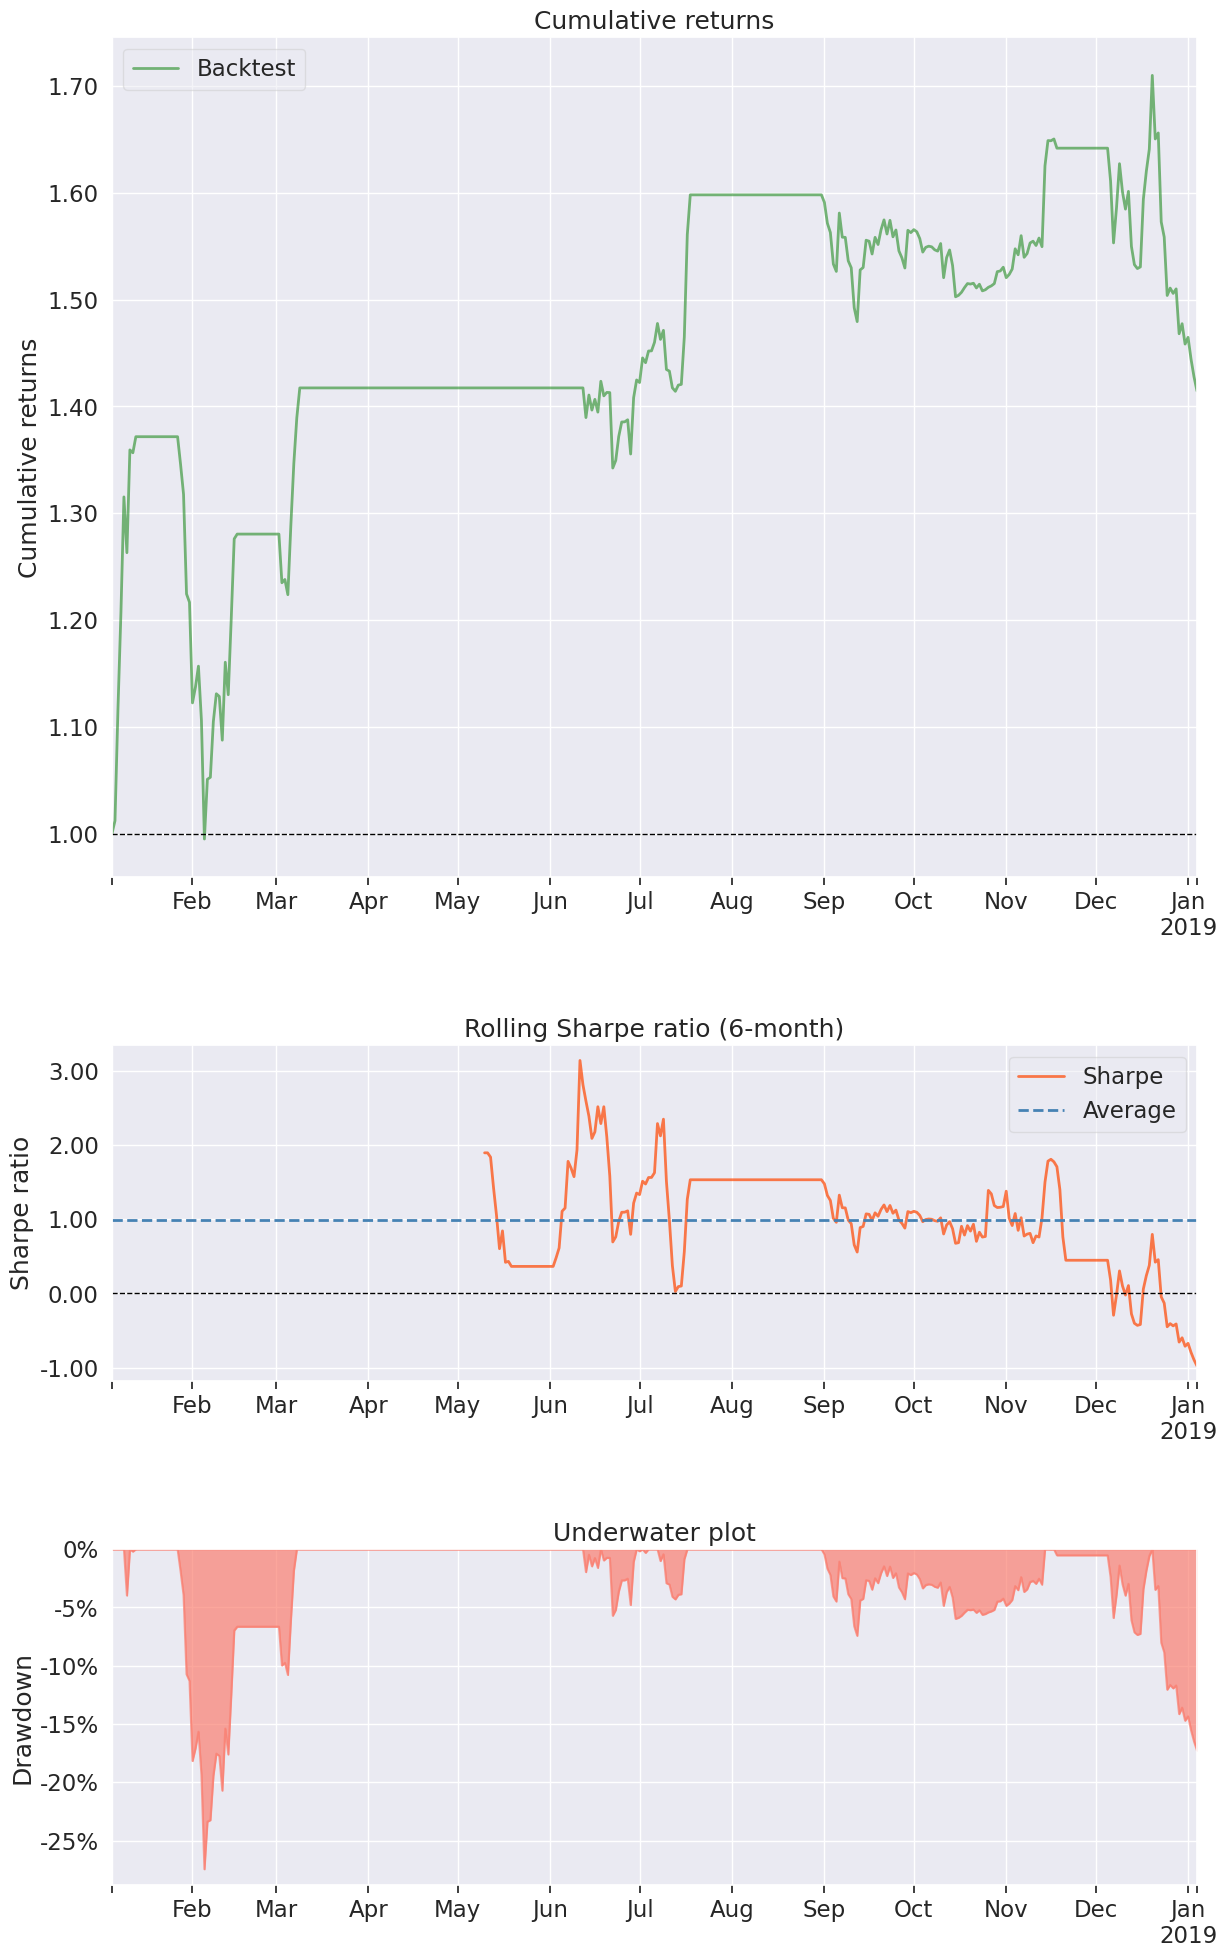

In [89]:
import warnings
warnings.filterwarnings('ignore')
# y_series, x_series, start_full, end_full, start_train, end_train
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')

#12 months calculate, 6 months sample by sample, we can move this window to simulate strategy?
# or rebalance every day
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2021-04-13','2024-04-12','2021-04-13','2023-04-12', 365)
# val = pair.run_strategy()
# pair.plot_pair(pair.results)


# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2017-07-05','2019-01-05','2017-07-05','2018-07-05', 365)


pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')

print(pair.is_valid_pair)
val = pair.run_strategy(z=1)
pair.plot_pair(pair.results)



pf.create_simple_tear_sheet(pair.results['strategy'])

pair.results




Start date,2018-01-05
End date,2019-01-04
Total months,17
,Backtest
Annual return,27.044%
Cumulative returns,41.438%
Annual volatility,29.258%
Sharpe ratio,0.96
Calmar ratio,0.98
Stability,0.62
Max drawdown,-27.461%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.46,2018-01-27,2018-02-05,2018-03-08,29
1,17.28,2018-12-20,2019-01-04,NaT,NaN
2,7.43,2018-08-31,2018-09-12,2018-11-14,54
3,7.35,2018-11-17,2018-12-15,2018-12-20,24
4,5.71,2018-06-18,2018-06-22,2018-06-30,10


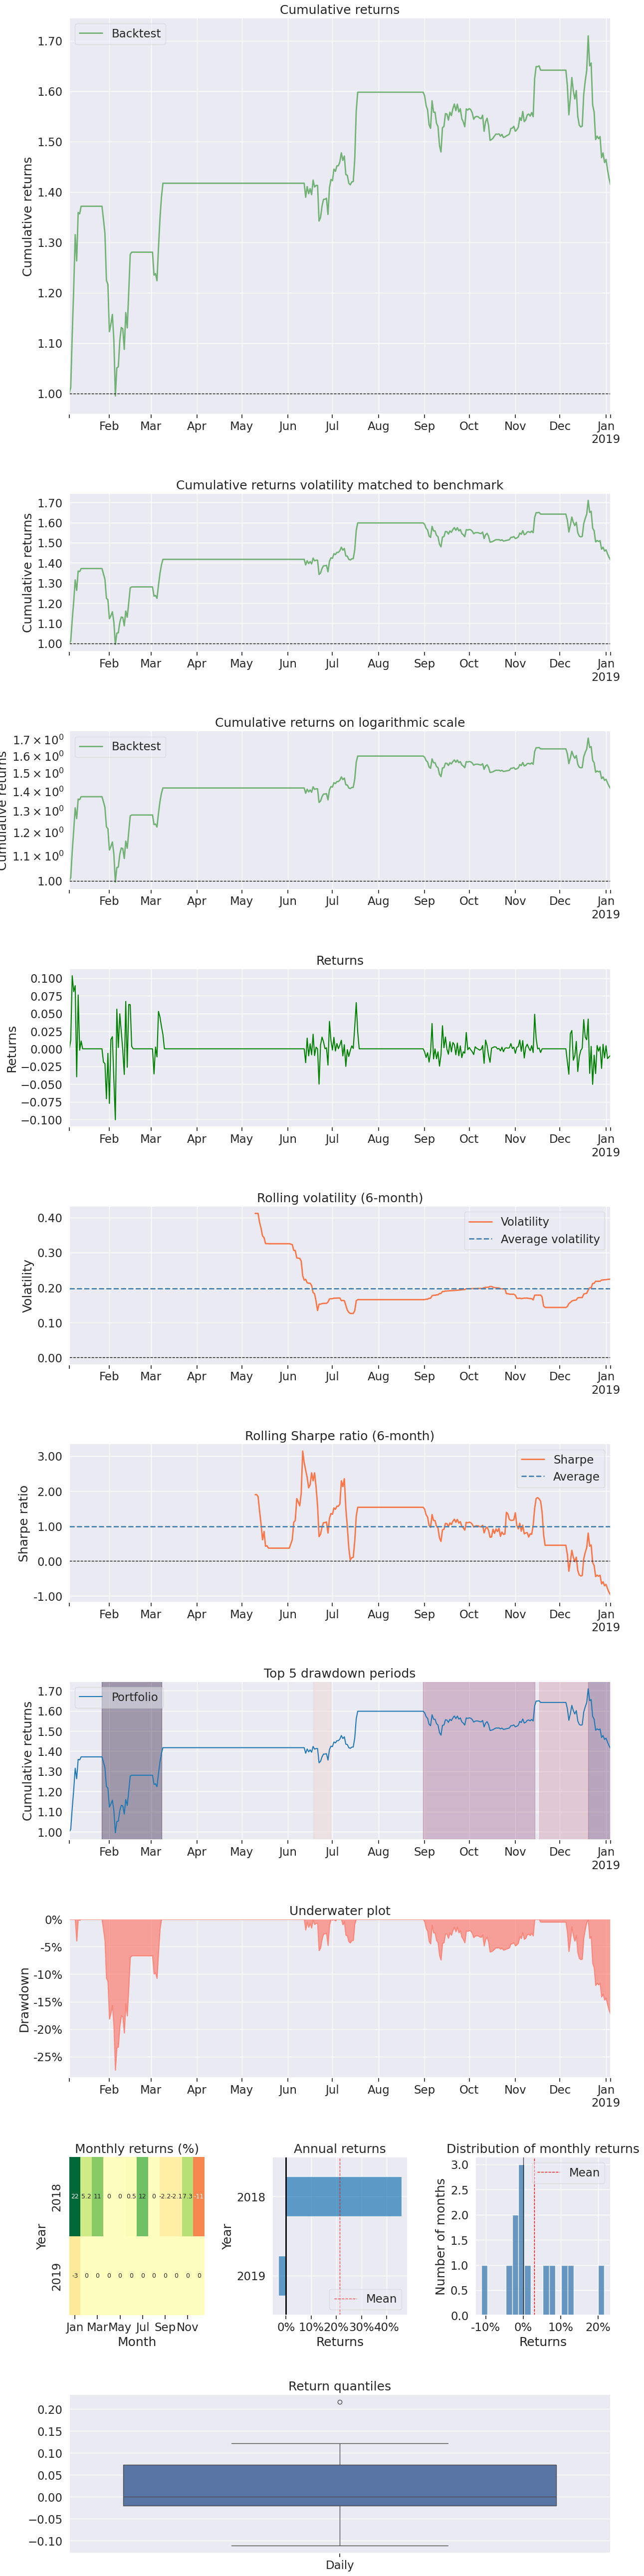

In [90]:
#just compare this with other model - if it matches then good!!!
pf.create_full_tear_sheet(pair.results['strategy'])

Positions head:
 Date
2018-01-01   -1.0
2018-01-02   -1.0
2018-01-03   -1.0
2018-01-04   -1.0
2018-01-05   -1.0
Name: position, dtype: float64
Asset1 returns head:
 Date
2018-01-01         NaN
2018-01-02    0.144702
2018-01-03    0.088503
2018-01-04    0.018907
2018-01-05    0.017125
Name: ETH-USD, dtype: float64
Asset2 returns head:
 Date
2018-01-01         NaN
2018-01-02    0.097011
2018-01-03    0.014611
2018-01-04    0.026196
2018-01-05    0.117333
Name: BTC-USD, dtype: float64
Strategy returns head:
             2018-01-01 00:00:00  2018-01-02 00:00:00  2018-01-03 00:00:00  \
Date                                                                        
2018-01-01                  NaN                  NaN                  NaN   
2018-01-02                  NaN                  NaN                  NaN   
2018-01-03                  NaN                  NaN                  NaN   
2018-01-04                  NaN                  NaN                  NaN   
2018-01-05                 

<Axes: xlabel='Date'>

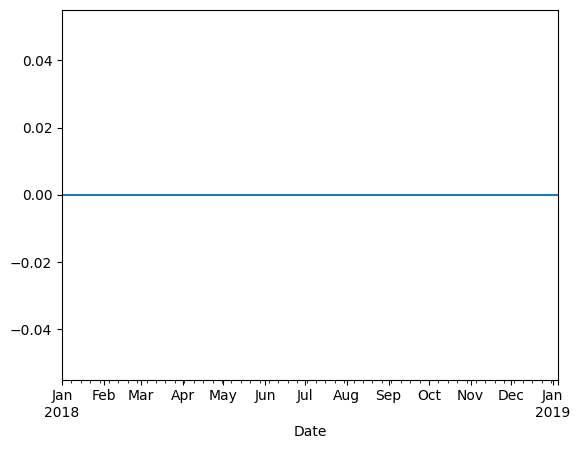

In [17]:
position = pair.results['position']

daily_returns = compute_strategy_returns(positions=position, asset1=pair.x_full, asset2=pair.y_full)
daily_returns.plot()

In [7]:
pair.results.head(100)

,price_y,price_x,full_resid,b,return_y,return_x,return,mu,dist,lower_bound,upper_bound,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,,
2018-01-05,1.0000,1.0000,0.3573,0.4113,0.0000,0.0000,0.0000,-0.002326,0.359626,-0.060228,0.055576,-1.0,0.0000,1.000000,1.000000
2018-01-06,1.0056,1.0441,0.3448,0.4113,0.0056,0.0431,-0.0122,-0.002326,0.347126,-0.060228,0.055576,-1.0,0.0122,0.987874,1.012275
2018-01-07,0.9454,1.1558,0.2386,0.4113,-0.0617,0.1017,-0.1036,-0.002326,0.240926,-0.060228,0.055576,-1.0,0.1036,0.890653,1.122771
2018-01-08,0.8704,1.1512,0.1655,0.4113,-0.0827,-0.0040,-0.0810,-0.002326,0.167826,-0.060228,0.055576,-1.0,0.0810,0.821355,1.217501
2018-01-09,0.8374,1.3027,0.0702,0.4113,-0.0386,0.1237,-0.0895,-0.002326,0.072526,-0.060228,0.055576,-1.0,0.0895,0.751037,1.331492
2018-01-10,0.8591,1.2587,0.1100,0.4113,0.0256,-0.0344,0.0397,-0.002326,0.112326,-0.060228,0.055576,-1.0,-0.0397,0.781453,1.279667
2018-01-11,0.7691,1.1576,0.0616,0.4113,-0.1106,-0.0837,-0.0761,-0.002326,0.063926,-0.060228,0.055576,-1.0,0.0761,0.724191,1.380851
2018-01-12,0.8021,1.2761,0.0458,0.4113,0.0420,0.0975,0.0019,-0.002326,0.048126,-0.060228,0.055576,-1.0,-0.0019,0.725568,1.378230
2018-01-13,0.8239,1.3996,0.0168,0.4113,0.0268,0.0924,-0.0112,-0.002326,0.019126,-0.060228,0.055576,-1.0,0.0112,0.717487,1.393753



Pyfolio, a Python library for performance and risk analysis of financial portfolios, primarily expects returns as input in the form of simple returns, not log returns. This is because most of Pyfolio's functions and metrics are designed to work with simple returns. However, it's relatively straightforward to convert log returns to simple returns if you have your data in log returns format.

In [7]:
import pyfolio as pf
import pandas as pd
import numpy as np
import yfinance as yf

# Load historical data for a stock (e.g., Apple Inc.)
stock_data = yf.download('QQQ', start='2019-01-01', end='2021-12-31')

# Calculate daily returns
stock_data['returns'] = stock_data['Adj Close'].pct_change()


# ret_log = np.log(stock_data['Adj Close'] / stock_data['Adj Close'].shift(1)).fillna(0)

# Assume a simple buy and hold strategy
strategy_returns = stock_data['returns']
# strategy_returns
# ret_log
# # Create a benchmark (e.g., S&P 500)
# benchmark_data = yf.download('^GSPC', start='2019-01-01', end='2021-12-31')
# benchmark_returns = benchmark_data['Adj Close'].pct_change()

# # Create a tear sheet for the strategy
# strategy_returns
# pf.create_simple_tear_sheet(pair.results['net_strategy'])

[*********************100%%**********************]  1 of 1 completed
